In [2]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

##### Without eps greedy decay cutoff

In [2]:
#experiment configurations
env_config_1 = {
        "collision_reward": -1,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True],
         "network_hidden_sizes": [[128,128]],
         "use_double_q_learning": [False]


    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0,
         "epsilon_end_time": 1
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [3]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/eps_greedy/without_cutoff")

Directory data/eps_greedy/without_cutoff doesn't exist. Creating it now...



Weight tuple: 100%|██████████| 30/30 [13:13<00:00, 26.44s/it]




##### With eps greedy decay cutoff

In [4]:
#experiment configurations
env_config_1 = {
        "collision_reward": -1,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True],
         "network_hidden_sizes": [[128,128]],
         "use_double_q_learning": [False]


    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0,
         "epsilon_end_time": 0.8
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [5]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/eps_greedy/with_cutoff")

Directory data/eps_greedy/with_cutoff doesn't exist. Creating it now...



Weight tuple: 100%|██████████| 30/30 [13:05<00:00, 26.18s/it]




### Data preprocessing

In [4]:
#load the data
df_1 = pd.read_csv("data/eps_greedy/with_cutoffexperiment_merged.csv")
df_2 = pd.read_csv("data/eps_greedy/without_cutoffexperiment_merged.csv")
df_1["eps_cutoff"] = True
df_2["eps_cutoff"] = False

df_complete = pd.concat([df_1,df_2])
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1200 non-null   int64  
 1   repetition_number                 1200 non-null   int64  
 2   weight_index                      1200 non-null   int64  
 3   weight_tuple                      1200 non-null   object 
 4   num_iterations                    1200 non-null   int64  
 5   normalised_speed_reward           1200 non-null   float64
 6   normalised_energy_reward          1200 non-null   float64
 7   raw_speed_reward                  1200 non-null   float64
 8   raw_energy_reward                 1200 non-null   float64
 9   env_config_id                     1200 non-null   int64  
 10  gamma                             1200 non-null   float64
 11  replay_buffer_size                1200 non-null   int64  
 12  use_reward_n

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper,use_default_reward_normalisation,network_hidden_sizes,use_double_q_learning,eps_cutoff
0,0,0,0,"[0.0, 1.0]",80,0.091771,0.999769,7.341663,79.981488,0,0.9,1000,False,True,"[128, 128]",False,True
1,1,1,0,"[0.0, 1.0]",80,0.074699,0.975158,5.975901,78.012614,0,0.9,1000,False,True,"[128, 128]",False,True
2,2,2,0,"[0.0, 1.0]",80,0.090633,0.998632,7.250606,79.890579,0,0.9,1000,False,True,"[128, 128]",False,True
3,3,3,0,"[0.0, 1.0]",80,0.084574,0.992572,6.765906,79.405730,0,0.9,1000,False,True,"[128, 128]",False,True
4,4,4,0,"[0.0, 1.0]",80,0.093979,0.994476,7.518293,79.558069,0,0.9,1000,False,True,"[128, 128]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,15,29,"[1.0, 0.0]",80,0.744761,0.681677,59.580861,54.534124,0,0.9,1000,False,True,"[128, 128]",False,False
596,596,16,29,"[1.0, 0.0]",35,0.764689,0.533924,26.764117,18.687328,0,0.9,1000,False,True,"[128, 128]",False,False
597,597,17,29,"[1.0, 0.0]",8,0.604754,0.324494,4.838034,2.595954,0,0.9,1000,False,True,"[128, 128]",False,False
598,598,18,29,"[1.0, 0.0]",18,0.829195,0.509383,14.925516,9.168903,0,0.9,1000,False,True,"[128, 128]",False,False


In [5]:
#preprocess the dataframe
multi_index_list = ["eps_cutoff", "network_hidden_sizes"]
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

eps_cutoff network_hidden_sizes normalised_energy_reward  \
weight_index                                                        0   
0                 False           [128, 128]                 0.964655   
1                  True           [128, 128]                 0.985074   

                                                                          \
weight_index         1         2         3         4         5         6   
0             0.969940  0.955415  0.961741  0.962143  0.966574  0.967378   
1             0.981382  0.974316  0.983164  0.970456  0.961555  0.971183   

                        ... normalised_speed_reward                      \
weight_index         7  ...                      21        22        23   
0             0.956278  ...                0.796705  0.754389  0.862385   
1             0.976390  ...                0.789207  0.687345  0.775261   

                                                                          \
weight_index        24        25        26        27        28        29   
0             0.890395  0.843501  0.794016  0.831075  0.870206  0.805481   
1             0.796250  0.745589  0.759845  0.849665  0.801369  0.788925   

             experiment_index  
weight_index                   
0                           0  
1                           1  

[2 rows x 63 columns]

In [6]:
multi_index_list = ["eps_cutoff", "weight_index"]

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())
display(grouped_df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, (False, 0) to (True, 29)
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   eps_cutoff                60 non-null     bool   
 1   weight_index              60 non-null     int64  
 2   normalised_speed_reward   60 non-null     float64
 3   normalised_energy_reward  60 non-null     float64
 4   experiment                60 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 3.5+ KB


None

eps_cutoff  weight_index  normalised_speed_reward  \
eps_cutoff weight_index                                                      
False      0                  False             0                 0.056657   
           1                  False             1                 0.062318   
           2                  False             2                 0.048926   
           3                  False             3                 0.056005   
           4                  False             4                 0.059428   
           5                  False             5                 0.063101   
           6                  False             6                 0.071586   
           7                  False             7                 0.073302   
           8                  False             8                 0.070710   
           9                  False             9                 0.096159   
           10                 False            10                 0.173858   
           11                 False            11                 0.204817   
           12                 False            12                 0.303849   
           13                 False            13                 0.615992   
           14                 False            14                 0.655549   
           15                 False            15                 0.664512   
           16                 False            16                 0.797658   
           17                 False            17                 0.801869   
           18                 False            18                 0.799876   
           19                 False            19                 0.807744   
           20                 False            20                 0.832057   
           21                 False            21                 0.796705   
           22                 False            22                 0.754389   
           23                 False            23                 0.862385   
           24                 False            24                 0.890395   
           25                 False            25                 0.843501   
           26                 False            26                 0.794016   
           27                 False            27                 0.831075   
           28                 False            28                 0.870206   
           29                 False            29                 0.805481   
True       0                   True             0                 0.078578   
           1                   True             1                 0.075642   
           2                   True             2                 0.067825   
           3                   True             3                 0.078934   
           4                   True             4                 0.066606   
           5                   True             5                 0.058083   
           6                   True             6                 0.072625   
           7                   True             7                 0.076701   
           8                   True             8                 0.081329   
           9                   True             9                 0.099945   
           10                  True            10                 0.154467   
           11                  True            11                 0.145459   
           12                  True            12                 0.231082   
           13                  True            13                 0.505768   
           14                  True            14                 0.558672   
           15                  True            15                 0.711066   
           16                  True            16                 0.599153   
           17                  True            17                 0.675774   
           18                  True            18                 0.766455   
           19                  True            

In [7]:
nds = NonDominatedSorting()
value_columns = ["normalised_speed_reward", "normalised_energy_reward"]
#add pareto information
grouped_df["pareto"] = False
experiment_indices = grouped_df["experiment"].unique()
for index in experiment_indices:
    #get data of a specific experiment
    data = grouped_df[grouped_df["experiment"] == index]
    #compute the indices containing non-dominated points
    pareto_indices = nds.do(-1 * data[value_columns], only_non_dominated_front=True)
    #set pareto flag to True at the corresponding indices of the entire dataframe
    grouped_df.loc[(grouped_df["experiment"] == index) & (data["weight_index"].isin(pareto_indices)),"pareto"] = True


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

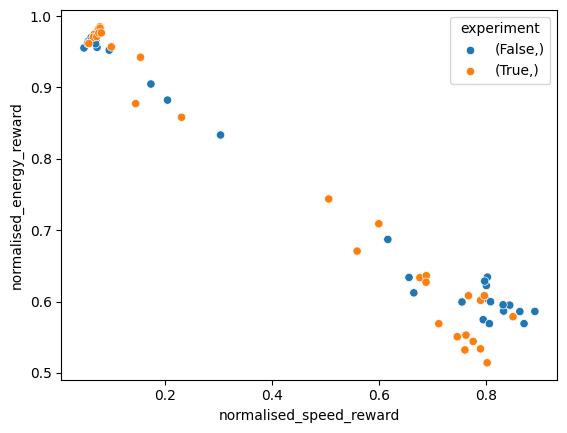

In [8]:
#plot all points
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

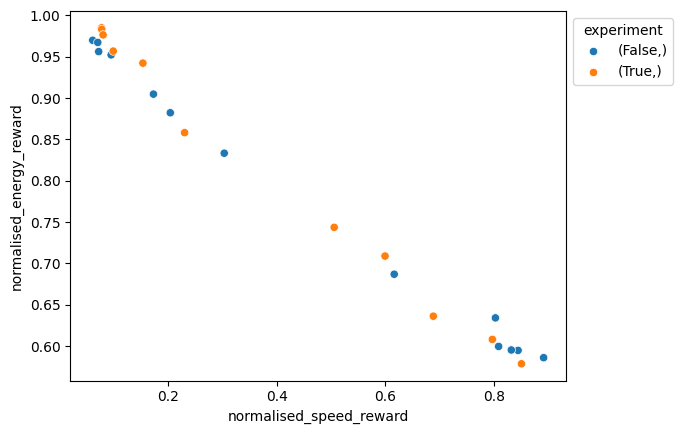

In [9]:
#plot only non-dominated points
ax = sns.scatterplot(data=grouped_df[grouped_df["pareto"]==True], x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [10]:
# num iterations
multi_index_list = ["eps_cutoff", "weight_index"]
value_list = ["num_iterations"]
grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)

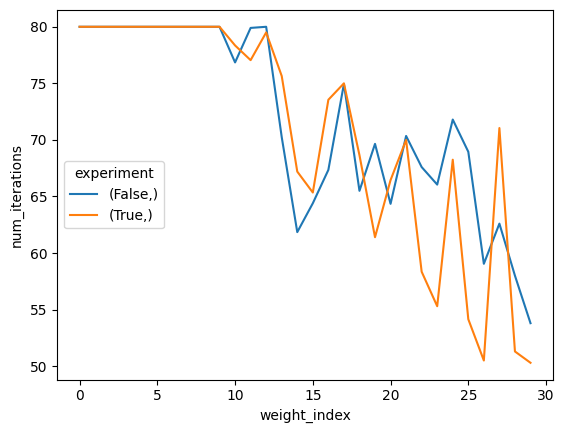

In [11]:
ax = sns.lineplot(grouped_df, x="weight_index", y="num_iterations", hue="experiment")
sns.move_legend(ax, "center left")

df_complete.groupby(["env_config_id", "weight_index"])["num_iterations"].mean()
print()

experiment_id 0 --> collision reward -1
experiment_id 1 --> collision reward 0
--> collision reward of -1 works better.